In [1]:
# Importing the relevant libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

In [2]:
# Defining the function which will be integrated
def f(x):
    return x**2 + x + np.log(x)

# Setting the lower (a) and upper (b) boundaries of the integration
a = 9
b = 12

In [3]:
# Implementing the trapezoid method, firstly define the segment count (n_trapezoid), must be a whole number
# Higher segment count translates to better accuracy
n_trapezoid = 3000001

# Defining the interval (h_trapezoid)
h_trapezoid = (b - a)/n_trapezoid

# Iteration index and variable to calculate the integration results
i_trapezoid     = 1
trapezoid_total = 0

# The loop
while i_trapezoid != n_trapezoid:
      i_trapezoid     += 1
      trapezoid_total += 0.5 * h_trapezoid * (f(a + (i_trapezoid - 2)*h_trapezoid) + f(a + (i_trapezoid - 1)*h_trapezoid))

In [4]:
# Implementing 1/3 Simpson method, firstly define the number of points (n_onethird), must be an odd number greater than 1.
# Higher segment count translates to better accuracy
n_onethird = 3000001

if n_onethird % 2 == 0:
   print('Calculation not possible, select valid number of points')
else:
# Defining the interval (h_onethird)
   h_onethird     = (b - a)/n_onethird

# Iteration index and variable to calculate the integration results
   i_onethird     = 0
   onethird_total = 0

# The loop
   while i_onethird <= n_onethird:
         if   i_onethird == 0 or i_onethird == n_onethird:
            onethird_total += (h_onethird/3)* f(a + i_onethird*h_onethird)
            i_onethird     += 1
         elif i_onethird % 2 == 0:
            onethird_total += (h_onethird/3)* 2 * f(a + i_onethird*h_onethird)
            i_onethird     += 1
         else:
            onethird_total += (h_onethird/3)* 4 * f(a + i_onethird*h_onethird)
            i_onethird     += 1

In [5]:
# Implementing 3/8 Simpson method, firstly define the number of points (n_threeeighths), must be within the sequence 4,7,10,...
# Higher segment count translates to better accuracy
n_threeeights = 3000001

if n_threeeights % 3 != 1:
   print('Calculation not possible, select valid number of points')
else:
# Defining the interval (h_threeeights)
   h_threeeights     = (b - a)/n_threeeights

# Iteration index and variable to calculate the integration results
   i_threeeights     = 0
   threeeights_total = 0

# The loop
   while i_threeeights <= n_threeeights:
         if   i_threeeights == 0 or i_threeeights == n_threeeights:
            threeeights_total += (h_threeeights*3/8)* f(a + i_threeeights*h_threeeights)
            i_threeeights     += 1
         elif i_threeeights % 3 == 0:
            threeeights_total += (h_threeeights*3/8)* 2 * f(a + i_threeeights*h_threeeights)
            i_threeeights     += 1
         else:
            threeeights_total += (h_threeeights*3/8)* 3 * f(a + i_threeeights*h_threeeights)
            i_threeeights     += 1

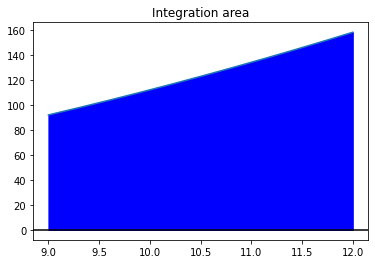

,Segment Count,Result
Method,,
Trapezoid,3000001,371.543700
Simpson 1/3,3000001,371.543806
Simpson 3/8,3000001,371.543819


In [6]:
# Displaying the graph and integration results
x = np.linspace   (a, b, max(n_threeeights,n_trapezoid,n_onethird))
plt.title         ('Integration area')
plt.plot          (x, f(x))
plt.axhline       (color = 'black')
plt.fill_between  (x, f(x), where = [ x > a and x < b for x in x ], color = 'blue')
plt.show          ()

data = {'Method'       : ['Trapezoid', 'Simpson 1/3', 'Simpson 3/8'],
        'Segment Count': [n_trapezoid, n_onethird, n_threeeights],
        'Result'       : [trapezoid_total, onethird_total, threeeights_total]}
df   = pd.DataFrame(data).set_index('Method')
df